In [21]:
import torch
from torch import nn

import torchvision
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder

from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

from PIL import Image
import os

from pathlib import Path
import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
class PneumoniaDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
        
    def __getitem__(self, idx):
        return self.data[idx]
    
    def __len__(self):
        return len(self.data)
    
    @property
    def classes(self):
        return self.data.classes

In [56]:
train_data = PneumoniaDataset(data_dir=train_dir,
                              transform=None)

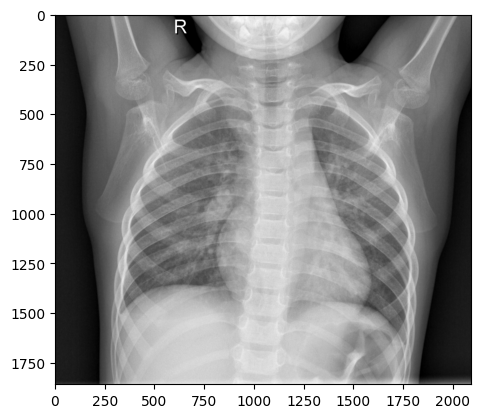

In [59]:
img, label = train_data[0]
plt.imshow(img)

In [ ]:
train_data = PneumoniaDataset()

In [17]:
# For the sake of reporducibility
torch.manual_seed(111)
np.random.seed(111)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [19]:
# Setup data paths
data_dir = Path('/kaggle/input/chest-xray-pneumonia/chest_xray')
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'
val_dir = data_dir / 'val'

In [30]:
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

train_data = []

for image in normal_cases:
    train_data.append((image, 0))

for image in pneumonia_cases:
    train_data.append((image, 1))
    
train_data = pd.DataFrame(train_data, 
                          columns=['image', 'label'])
train_data = train_data.sample(frac=1.).reset_index(drop=True)

train_data

,image,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,0
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
...,...,...
5211,/kaggle/input/chest-xray-pneumonia/chest_xray/...,0
5212,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
5213,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
5214,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1


In [31]:
train_data['label'].value_counts()

label
1    3875
0    1341
Name: count, dtype: int64

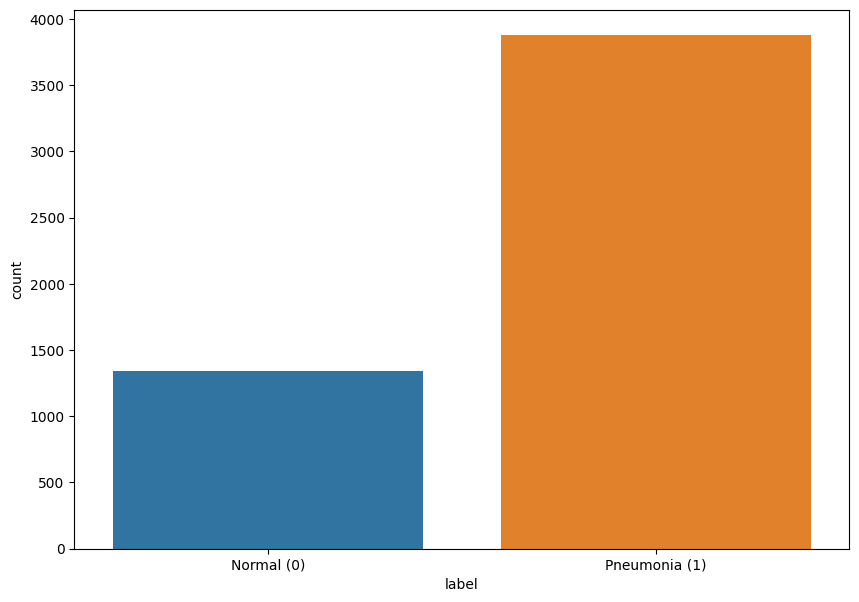

In [34]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=train_data, x='label')
ax.set_xticklabels(['Normal (0)', 'Pneumonia (1)'])
plt.show()

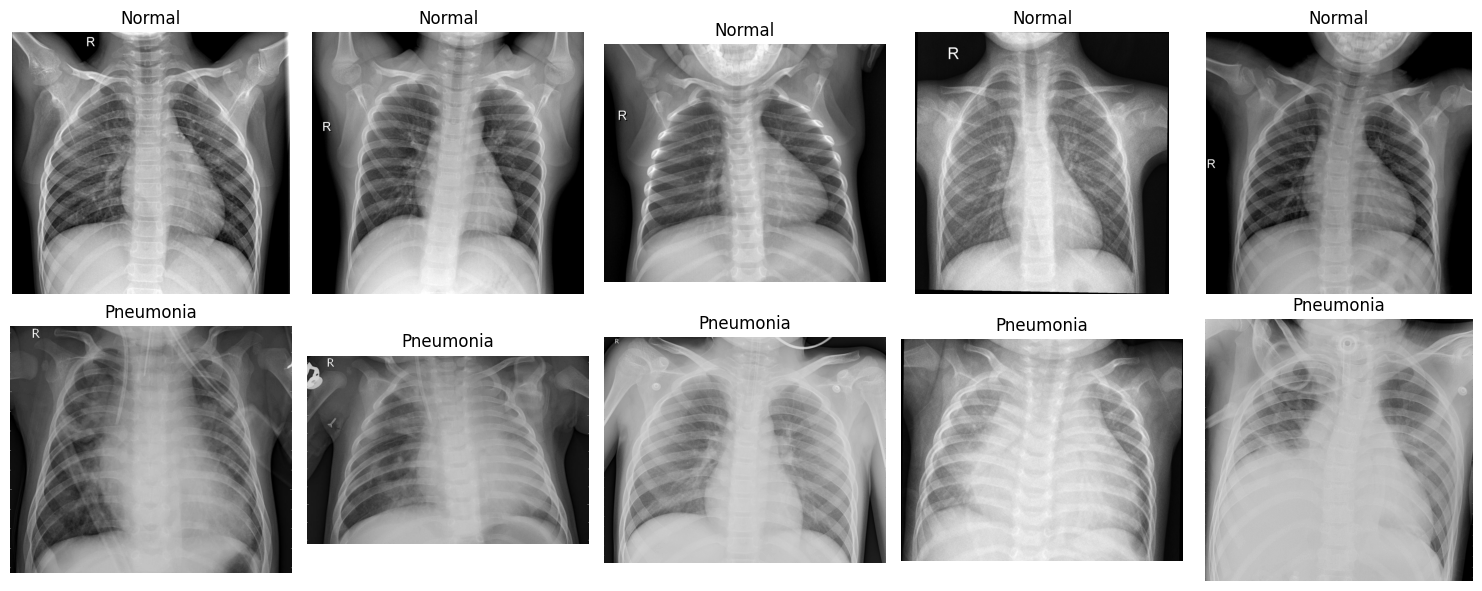

In [47]:
normal_samples = train_data.query('label == 0')['image'][:5].tolist()
pneumonia_samples = train_data.query('label == 1')['image'][:5].tolist()

samples = normal_samples + pneumonia_samples
del normal_samples, pneumonia_samples

labels = ['Normal'] * 5 + ['Pneumonia'] * 5

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, (image_path, label) in enumerate(zip(samples, labels)):
    img = Image.open(image_path)
    
    axs[i // 5, i % 5].imshow(img, cmap='gray')
    axs[i // 5, i % 5].set_title(label)
    axs[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

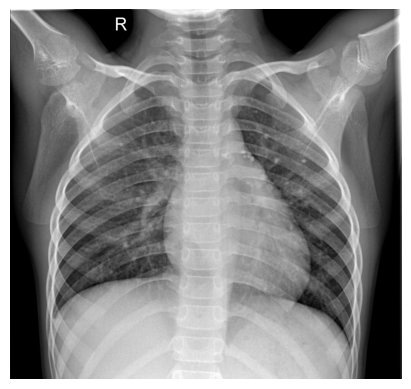

In [44]:
img = Image.open(lst[0])
plt.imshow(img, cmap='gray')
plt.axis(False)
plt.show()